# User Controller

In [21]:
from plugins import db

In [22]:
x = db.User()

In [23]:
x.users[0]

{'verified': '2019-06-10T00:28:28.938727',
 'preferences': ['1',
  '2',
  '3',
  '5',
  '4',
  '6',
  '7',
  '8',
  '11',
  '12',
  '13',
  '15',
  '16'],
 'email': 'drahomira.platlova@merck.com',
 'uuid': 'd3d4883e-5d9c-440c-bcc4-9c44109e54dd',
 'language': 'original',
 'token': 'e41fa40e579e82fc8cb8e7e187543dea4ce77b4fbd3dae2b5b4e0bae',
 'salt': 'JITuzV9ay7HbBRSO',
 'registered': '2019-06-10T00:28:28.931836'}

In [526]:
from datetime import datetime
import dateutil.parser

def pretty_datetime(dt):
    foo = dateutil.parser.parse(dt)
    return datetime.strftime( foo, '%Y-%m-%d %H:%M')

In [527]:
a = '2019-06-10T00:28:28.955992'

pretty_datetime(a)

'2019-06-10 00:28'

In [524]:
datetime.strftime(b, '%Y-%m-%d %H:%M')

'2019-06-10 00:28'

In [535]:
from datetime import datetime

datetime.today().date()

datetime.date(2019, 8, 25)

In [1]:
from blueprints.lunchscraper import controller

In [2]:
controller.User().email_verification_html("4817621b-8127-4d9b-abb7-a234c03c420f")

<Response [200]>

In [546]:
controller.User().get()[-1]

{'email': 'francesca.mendolia@merck.com',
 'language': 'original',
 'preferences': ['1', '2', '3', '4', '5', '6', '7', '8'],
 'registered': '2019-09-06T09:28:26.875699',
 'salt': '2a1lZfdygMD6PqE6',
 'token': '3a47874a24b9cc6d51c45ab1ed479fab66e84403d807a4f773fe54a6',
 'uuid': 'f28b9228-ec19-4d19-aa00-c035d07e1d0c',
 'verified': False}

In [548]:
controller.User().emao(token="f28b9228-ec19-4d19-aa00-c035d07e1d0c")

TypeError: verify() got an unexpected keyword argument 'uuid'

In [13]:
key = "QLJcPV9A5Z6uC9yeped7Gg"
secret = "gPARgGYqmIxTxtE5B3slIYrYktpMujKyfgiGEqjkFc"

import requests

url = "https://www.goodreads.com/api/auth_user"

In [14]:
r = requests.get(url)

In [19]:
r.text

'Invalid OAuth Request\n<!-- This is a random-length HTML comment: tdjpjopglgrntkyj -->'

In [270]:
def get_info():
    with open('counter.txt', 'r+', encoding="utf-8-sig") as f:
        lines = f.readlines()
        lines.reverse()
        
        # Get total count
        count = 0
        for line in lines:
            if 'ADD' in line:
                count += 1
        
        # Get last start/end date
        for line in lines:
            state = line.strip().split(";")
            if state[0] in ['START', 'END']:
                break
        
        time = int( state[1] )
        time_nice = dt.datetime.fromtimestamp(time).strftime("%H:%M:%S")
            
        return {'pieces': count, 'status': state[0], 'time': time ,'time_pretty': time_nice  }

In [271]:
get_info()

{'pieces': 3911,
 'status': 'END',
 'time': 1588922262,
 'time_pretty': '09:17:42'}

In [292]:
import datetime as dt
def get_sessions():
    with open('counter.txt', 'r+', encoding="utf-8-sig") as f:
        lines = f.readlines()
        
    sessions = []
    
    for n, line in enumerate(lines):
        
        try:
            action, timestamp = line.split(';')

            if action == "STA":
                session = {
                    "START": round(float(timestamp.strip())),
                    "PIECES": 0,
                }
            elif action == "ADD":
                session['PIECES'] += 1
            elif action == "END":
                session["END"] = round(float(timestamp.strip()))
                session["DURATION"] = session["END"] - session["START"]
                session["START"] = dt.datetime.fromtimestamp(session["START"]).strftime("%Y-%m-%d %H:%M:%S")
                session["END"] = dt.datetime.fromtimestamp(session["END"]).strftime("%Y-%m-%d %H:%M:%S")
                sessions += [session]
        except Exception as e:
            print("ERROR: {}\nLINE: {}\nVALUE: {}".format(e, n, line))
            
    return sessions

In [293]:
x = get_sessions()


In [315]:
x[-1]['START'][:10]  == dt.date.today().isoformat()

today = dt.date.today().isoformat()
yesterday = (dt.date.today() - dt.timedelta(days=1)).isoformat()

In [316]:
yesterday

'2020-05-08'

In [280]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

In [281]:
df = pd.DataFrame(x)

In [282]:
df['DATE'] = pd.to_datetime(df['START']).dt.date

In [283]:
df.groupby('DATE')['PIECES'].sum()

DATE
2020-01-19    125
2020-01-21      3
2020-01-22     18
2020-01-23      4
2020-02-02    102
2020-02-03    100
2020-02-04      4
2020-02-07    109
2020-02-08    150
2020-02-09    104
2020-02-10     42
2020-02-15     59
2020-02-16     51
2020-02-18     48
2020-02-20     20
2020-02-23     16
2020-03-04     41
2020-03-08     28
2020-03-09     10
2020-03-16     68
2020-03-17     35
2020-03-21    135
2020-03-24    133
2020-03-25      7
2020-03-27     60
2020-03-28     69
2020-04-03      4
2020-04-04     62
2020-04-05     20
2020-04-06     16
2020-04-09     65
2020-04-12     45
2020-04-13     94
2020-04-15     36
2020-04-16     15
2020-04-17     16
2020-04-18    214
2020-04-19    183
2020-04-20     24
2020-04-21     65
2020-04-22    100
2020-04-23    100
2020-04-24      4
2020-04-25    232
2020-04-26     77
2020-04-28     25
2020-04-29    111
2020-04-30    125
2020-05-01    250
2020-05-02     71
2020-05-03    119
2020-05-04     27
2020-05-05     45
2020-05-07    104
2020-05-08    120
Name:

In [284]:
df.groupby('DATE')['PIECES'].sum().mean()

71.0909090909091

In [285]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['CUMSUM'] = df['PIECES'].cumsum()

In [286]:
df2020 = pd.DataFrame(pd.date_range("2020/01/01","2020/12/31"))
df2020 = pd.DataFrame(pd.date_range("2020/01/01","2020/04/30"))
df2020.columns = ['DATE']

In [287]:
dfx = pd.merge(df2020, df, how="left", left_on="DATE", right_on="DATE")

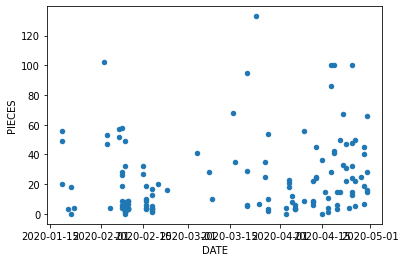

In [288]:
dfx.plot(x='DATE', y='PIECES', kind='scatter')

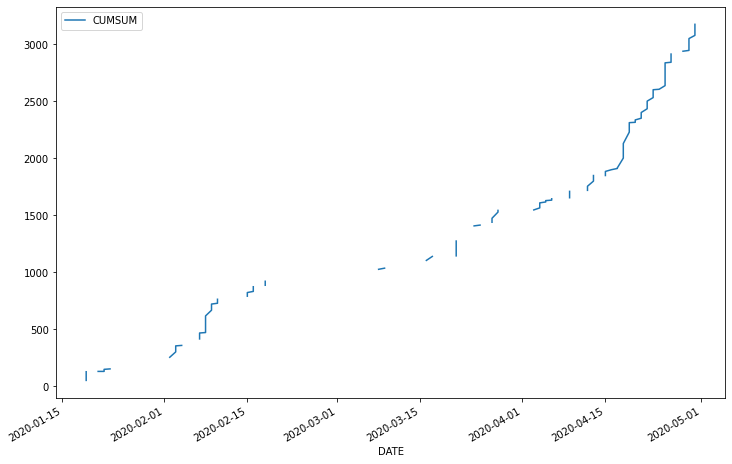

In [289]:
dfx.plot(x='DATE', y='CUMSUM', kind='line', figsize=(12,8))

In [154]:
dfx.PIECES.mean()

23.686567164179106

In [155]:
dfx.PIECES = dfx.PIECES.fillna(0)

In [163]:
daily = dfx.groupby(["DATE"]).PIECES.sum()

In [166]:
daily.mean()

26.231404958677686

In [257]:
import datetime, pandas as pd

class PuzzleCounter():

    def __init__(self):
        # with open('counter.txt', 'r+', encoding="utf-8-sig") as f:
        self.load_data()
        self.errors = []
        
#         with open('/home/vojtech/web.kotek.co/myapp/counter.txt', 'r+', encoding="utf-8-sig") as f:
#             self.lines = f.readlines()
            
#             self.dataframe = pandas.DataFrame(self.get_sessions())
#             self.counter = f.readlines()
#             self.count = self.count()
#             self.sessions = self.sessions()
#             self.last = self.sessions[-1]
#             self.state = self.state() # (state, time started (unix), time started (nice))
        pass
    
    def load_data(self):
        with open('/home/vojtech/web.kotek.co/myapp/counter.txt', 'r+', encoding="utf-8-sig") as f:
            self.lines = f.readlines()
        pass
    
    def dataframe(self):
        self.sesions = self.get_sessions()
        self.dataframe = pd.DataFrame(self.sessions)
        return self.dataframe

    def add(self, action):
        
        if action not in ('STA','END','ADD'):
            print("ERROR! Wrong action:", action)
            return False
        
        with open('/home/vojtech/web.kotek.co/myapp/counter.txt', 'a', encoding="utf-8-sig") as f:
            f.write('\n{};{}')
        pass

    def count(self):

        # Get total count
        count = 0
        for line in self.lines:
            if 'ADD' in line:
                count += 1

        return count
    
    def elapsed_seconds(self):
        seconds = 0
        return [seconds+x['DURATION'] for x in self.sessions]

    def sessions(self):

        sessions = []

        for n, line in enumerate(self.lines):

            try:
                action, timestamp = line.split(';')

                if action == "STA":
                    session = {
                        "START": round(float(timestamp.strip())),
                        "PIECES": 0,
                    }
                elif action == "ADD":
                    session['PIECES'] += 1
                elif action == "END":
                    session["END"] = round(float(timestamp.strip()))
                    session["DURATION"] = session["END"] - session["START"]
                    session["START"] = datetime.datetime.fromtimestamp(session["START"]).strftime("%Y-%m-%d %H:%M:%S")
                    session["END"] = datetime.datetime.fromtimestamp(session["END"]).strftime("%Y-%m-%d %H:%M:%S")
                    sessions += [session]
            except Exception as e:
                error = "ERROR: {}\nLINE: {}\nVALUE: {}".format(e, n, line)
                self.errors += [error]
                print(error)

        return sessions

    def state(self):

        lines = self.lines
        lines.reverse()

        # Get last start/end date
        for line in lines:
            state = line.strip().split(";")
            if state[0] in ['STA', 'END']:
                break

            time = float( state[1] )
            time_nice = datetime.datetime.fromtimestamp(time).strftime("%H:%M:%S")

        return (state[0], time, time_nice)

    def stats(self):
        
        def duration(seconds):
            return {
                'days': int( seconds // (60*60*24) ),
                'hours': int( ( seconds % (60*60*24) ) // (60*60) ),
                'minutes': int( ( seconds % (60*60) ) // (60) ),
                'seconds': int( seconds % (60*60) ),
            }

        self.rate = int(total_seconds / count)
        self.remaining_seconds = ( 9000 - count ) * self.rate
        self.remaining_time = duration(self.remaining_seconds)
        self.elapsed_seconds = []
       

        return {
            'total_seconds': duration(total_seconds),
            'time_pretty': time_nice,
        }
    
    def __str__(self):
        return str(self.count())


In [258]:
pc = PuzzleCounter()

In [259]:
pc.sessions()

ERROR: unsupported operand type(s) for -: 'int' and 'str'
LINE: 3631
VALUE: END;1588337226



[{'START': '2020-01-19 16:00:39',
  'PIECES': 49,
  'END': '2020-01-19 16:57:05',
  'DURATION': 3386},
 {'START': '2020-01-19 17:55:08',
  'PIECES': 20,
  'END': '2020-01-19 18:18:03',
  'DURATION': 1375},
 {'START': '2020-01-19 18:20:24',
  'PIECES': 56,
  'END': '2020-01-19 19:46:01',
  'DURATION': 5137},
 {'START': '2020-01-21 17:27:52',
  'PIECES': 3,
  'END': '2020-01-21 18:13:59',
  'DURATION': 2767},
 {'START': '2020-01-22 19:58:58',
  'PIECES': 0,
  'END': '2020-01-22 21:25:03',
  'DURATION': 5165},
 {'START': '2020-01-22 21:36:34',
  'PIECES': 18,
  'END': '2020-01-22 22:32:13',
  'DURATION': 3339},
 {'START': '2020-01-23 21:13:00',
  'PIECES': 4,
  'END': '2020-01-23 22:28:05',
  'DURATION': 4505},
 {'START': '2020-02-02 18:21:39',
  'PIECES': 102,
  'END': '2020-02-02 21:23:23',
  'DURATION': 10904},
 {'START': '2020-02-03 19:54:45',
  'PIECES': 47,
  'END': '2020-02-03 21:23:10',
  'DURATION': 5305},
 {'START': '2020-02-03 21:52:46',
  'PIECES': 53,
  'END': '2020-02-03 23:

In [182]:
pc.stats()

NameError: name 'total_seconds' is not defined

In [251]:
counter_file = "counter_backup.txt"

class Puzzle(object):
    
    # Total count
    # This session
    # Time per piece
    # Time spent
    
    
    def __init__(self):
        self.df = pd.read_csv('counter.txt', sep=";", header=0, names=["ACTION","TIMESTAMP"])
        

    def get_sessions(self):

        sessions = []

        for n, line in enumerate(self.df):

            try:
                action, timestamp = line.split(';')

                if action == "STA":
                    session = {
                        "START": round(float(timestamp.strip())),
                        "PIECES": 0,
                    }
                elif action == "ADD":
                    session['PIECES'] += 1
                elif action == "END":
                    session["END"] = round(float(timestamp.strip()))
                    session["DURATION"] = session["END"] - session["START"]
                    session["START"] = datetime.datetime.fromtimestamp(session["START"]).strftime("%Y-%m-%d %H:%M:%S")
                    session["END"] = datetime.datetime.fromtimestamp(session["END"]).strftime("%Y-%m-%d %H:%M:%S")
                    sessions += [session]
            except Exception as e:
                error = "ERROR: {}\nLINE: {}\nVALUE: {}".format(e, n, line)
                self.errors += [error]
                print(error)

        return sessions
    
    @privatemethod           
    def __append(action):
        
        if action not in ('STA','END','ADD'):
            print("ERROR! Wrong action:", action)
            return False # Action is not valid
        
        with open('/home/vojtech/web.kotek.co/myapp/counter.txt', 'a', encoding="utf-8-sig") as f:
            f.write('\n{};{}')
        pass            

    @staticmethod     
    def end():
        
        if action not in ('STA','END','ADD'):
            print("ERROR! Wrong action:", action)
            return False # Action is not valid
        
        with open('/home/vojtech/web.kotek.co/myapp/counter.txt', 'a', encoding="utf-8-sig") as f:
            f.write('\n{};{}')
        pass            
        
        
    
    def start():
        
        
    def add():
        
        
    def __str__(self):
        return "X"
    
    def __repr__(self):
        
        return "x"
        

p = Puzzle()

In [254]:
Puzzle.append()

AttributeError: type object 'Puzzle' has no attribute 'append'

In [245]:
for line in p.df.iterrows():
    pass

AttributeError: 'DataFrame' object has no attribute 'rows'

In [268]:
str.upper("hello")

'HELLO'

In [269]:
"Hello".upper()

'HELLO'